In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

predictions_path = r"../src/predictions.csv"
dataset_path = r"../../data/merged_dataset.csv"

In [18]:
# Metadata
df1 = pd.read_csv(dataset_path, encoding='latin-1')
df1.head()

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,area,crypto,skade
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
1,201506_l_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
2,201506_r_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
3,201506_r_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
4,201934_r_0.jpg,201934,m,220.0,NaN,2019-10-01,Pier,NaN,0,NaN,NaN,NaN,NaN


In [19]:
# Predictions
df2 = pd.read_csv(predictions_path, encoding='utf-8')
df2["filename"] = df2["filename"].apply(lambda x: x + ".jpg")
df2.head()

,filename,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506_l_0.jpg,829,829,124,222,1,1,124,349,124,...,145,339,145,145,433867_l_1,201506_l_0,201506_l_6,201506_l_6,5,1
1,201506_l_2.jpg,124,124,124,124,124,222,1,1,222,...,372,317,0,365,420885_l_2,201506_l_2,201506_l_4,201506_l_4,7,1
2,201506_l_3.jpg,124,1,124,1,124,371,829,222,124,...,176,270,270,270,420885_l_2,201506_l_3,201506_l_4,201506_l_4,2,1
3,201506_l_5.jpg,1,81,81,1,536,81,1,124,484,...,415,274,190,320,201506_l_4,201506_l_5,201506_l_4,201506_l_4,1,1
4,201506_r_2.jpg,262,262,0,0,0,0,262,0,262,...,294,335,226,335,421660_r_3,201506_r_2,201506_r_4,201506_r_4,3,0


In [20]:
# Metadata and predictions combined,
df = df1.merge(df2, left_on='filename', right_on='filename')
df.head()

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,...,145,339,145,145,433867_l_1,201506_l_0,201506_l_6,201506_l_6,5,1
1,204295_r_1.jpg,204295,m,149.0,0.0,2018-09-06,FieldMain,1.0,4,614.0,...,765,755,366,33,430999_r_2,204295_r_1,204295_r_0,204295_r_0,67,6
2,204942_r_1.jpg,204942,f,175.0,0.0,2020-08-30,FieldMain,1.0,11,1338.0,...,230,317,230,230,431065_r_0,204942_r_1,204942_r_0,204942_r_0,47,8
3,209127_r_0.jpg,209127,f,181.0,2.0,2020-06-29,FieldMain,1.0,10,1276.0,...,584,742,671,28,443592_r_0,209127_r_0,209127_r_1,209127_r_1,2,10
4,209526_r_0.jpg,209526,f,157.0,0.0,2020-06-30,FieldMain,1.0,10,1277.0,...,372,372,807,372,420268_r_0,209526_r_0,209526_r_1,209526_r_1,23,14


In [26]:
# Filter correct on first try

df_f = df.copy() #df[df["rank"] == 1]
df_f.head()

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,...,145,339,145,145,433867_l_1,201506_l_0,201506_l_6,201506_l_6,5,1
1,204295_r_1.jpg,204295,m,149.0,0.0,2018-09-06,FieldMain,1.0,4,614.0,...,765,755,366,33,430999_r_2,204295_r_1,204295_r_0,204295_r_0,67,6
2,204942_r_1.jpg,204942,f,175.0,0.0,2020-08-30,FieldMain,1.0,11,1338.0,...,230,317,230,230,431065_r_0,204942_r_1,204942_r_0,204942_r_0,47,8
3,209127_r_0.jpg,209127,f,181.0,2.0,2020-06-29,FieldMain,1.0,10,1276.0,...,584,742,671,28,443592_r_0,209127_r_0,209127_r_1,209127_r_1,2,10
4,209526_r_0.jpg,209526,f,157.0,0.0,2020-06-30,FieldMain,1.0,10,1277.0,...,372,372,807,372,420268_r_0,209526_r_0,209526_r_1,209526_r_1,23,14


In [30]:
# Gets the amount of image pairs grouped by period difference

def get_pit_dir(filename):
    """Transforms filename into a tag that contains both pit and direction."""
    basename = os.path.basename(filename)
    pit_dir = "_".join(basename.split("_")[:-1])
    return basename, pit_dir

#df1["Period"] = df1["Period"].astype(str)
df_f3 = df1[~df1['Period'].isin(["0", "May", "Oct"])]
df_f3 = df_f3[df_f3['filename'].str.len() > 0]
df_f3 = df_f3[df_f3['dataset'] != "quad"]
#df_f3["Period"] = df_f3["Period"].astype(str)

a = []
b = []
dist = []

for i, row in df_f3.iterrows():
    basename, pit_dir = get_pit_dir(row["filename"])

    if basename in a + b:
        continue

    pit = row["pit"]
    period = float(row["Period"].replace(',', '.'))
    df_sub = df_f3[df_f3["pit"] == pit]
    #df_sub["Period"] = df_sub["Period"].astype(str)

    for i2, row2 in df_sub.iterrows():
        basename2, pit_dir2 = get_pit_dir(row2["filename"])
        if pit_dir2 != pit_dir:
            continue
        if basename == basename2:
            continue
        period2 = float(row2["Period"].replace(',', '.'))
        diff = abs(period - period2)

        a.append(basename)
        b.append(basename2)
        dist.append(diff)

result = np.column_stack([a, b, dist])
unique_total, counts_total = np.unique(result[:,2], return_counts=True)
unique_total = unique_total.astype(np.float)
dict(zip(unique_total, counts_total))

{0.0: 181,
 0.5: 90,
 1.0: 194,
 1.5: 32,
 2.0: 75,
 3.0: 3,
 5.0: 34,
 6.0: 43,
 6.5: 21,
 7.0: 45,
 7.5: 8,
 8.0: 8,
 8.5: 14}

In [31]:
# Gets the period for each image

def find_period_support(row):
    filename = row["support_filename"] + ".jpg"
    period = df1[df1["filename"] == filename]["Period"]
    return list(period)[0]


def find_period_query(row):
    filename = row["query_filename"] + ".jpg"
    period = df1[df1["filename"] == filename]["Period"]
    return list(period)[0]


def find_period_correct(row):
    filename = row["correct_filename"] + ".jpg"
    period = df1[df1["filename"] == filename]["Period"]
    return list(period)[0]


def find_period_support_at_correct(row):
    filename = row["support_filename_at_correct"] + ".jpg"
    period = df1[df1["filename"] == filename]["Period"]
    return list(period)[0]


df_f["period_query"] = df_f.apply(find_period_query, axis=1)
df_f["period_support"] = df_f.apply(find_period_support, axis=1)
df_f["period_correct"] = df_f.apply(find_period_correct, axis=1)
df_f["period_support_at_correct"] = df_f.apply(find_period_support_at_correct, axis=1)

df_f

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,...,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y,period_query,period_support,period_correct,period_support_at_correct
0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,...,433867_l_1,201506_l_0,201506_l_6,201506_l_6,5,1,Oct,May,nan,nan
1,204295_r_1.jpg,204295,m,149.0,0.0,2018-09-06,FieldMain,1.0,4,614.0,...,430999_r_2,204295_r_1,204295_r_0,204295_r_0,67,6,4,4,3,3
2,204942_r_1.jpg,204942,f,175.0,0.0,2020-08-30,FieldMain,1.0,11,1338.0,...,431065_r_0,204942_r_1,204942_r_0,204942_r_0,47,8,11,11,"2,5","2,5"
3,209127_r_0.jpg,209127,f,181.0,2.0,2020-06-29,FieldMain,1.0,10,1276.0,...,443592_r_0,209127_r_0,209127_r_1,209127_r_1,2,10,10,11,4,4
4,209526_r_0.jpg,209526,f,157.0,0.0,2020-06-30,FieldMain,1.0,10,1277.0,...,420268_r_0,209526_r_0,209526_r_1,209526_r_1,23,14,10,4,"2,5","2,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,433982_l_6.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_l_7,433982_l_6,433982_l_7,433982_l_7,1,843,nan,nan,nan,nan
939,433982_l_11.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_l_7,433982_l_11,433982_l_7,433982_l_7,1,843,nan,nan,nan,nan
940,433982_r_3.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_r_0,433982_r_3,433982_r_0,433982_r_0,1,842,nan,Oct,Oct,Oct
941,433982_r_4.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_r_7,433982_r_4,433982_r_7,433982_r_7,1,842,nan,nan,nan,nan


In [32]:
# Filter out non-numeric periods and calculate difference

df_f2 = df_f[~df_f['period_query'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_correct'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support_at_correct'].isin(["0", "May", "Oct"])]

df_f2["period_query"] = df_f2["period_query"].str.replace(',', '.')
df_f2["period_support"] = df_f2["period_support"].str.replace(',', '.')
df_f2["period_correct"] = df_f2["period_correct"].str.replace(',', '.')
df_f2["period_support_at_correct"] = df_f2["period_support_at_correct"].str.replace(',', '.')

df_f2 = df_f2.astype({"period_query": float, "period_support": float, "period_correct": float, "period_support_at_correct": float})


def rank1_difference(row):
    if row["rank"] <= 1:
        return np.abs(row["period_query"] - row["period_support"])
    else:
        return np.NaN


def rank5_difference(row):
    if row["rank"] <= 5:
        return np.abs(row["period_query"] - row["period_support_at_correct"])
    else:
        return np.NaN


df_f2["period_difference"] = df_f2.apply(rank1_difference, axis=1)
df_f2["period_difference_5"] = df_f2.apply(rank5_difference, axis=1)
df_f2["correct_difference"] = np.abs(df_f2["period_query"] - df_f2["period_correct"])

df_f2

,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,...,support_filename_at_correct,rank,y,period_query,period_support,period_correct,period_support_at_correct,period_difference,period_difference_5,correct_difference
1,204295_r_1.jpg,204295,m,149.0,0.0,2018-09-06,FieldMain,1.0,4,614.0,...,204295_r_0,67,6,4.0,4.0,3.0,3.0,NaN,NaN,1.0
2,204942_r_1.jpg,204942,f,175.0,0.0,2020-08-30,FieldMain,1.0,11,1338.0,...,204942_r_0,47,8,11.0,11.0,2.5,2.5,NaN,NaN,8.5
3,209127_r_0.jpg,209127,f,181.0,2.0,2020-06-29,FieldMain,1.0,10,1276.0,...,209127_r_1,2,10,10.0,11.0,4.0,4.0,NaN,6.0,6.0
4,209526_r_0.jpg,209526,f,157.0,0.0,2020-06-30,FieldMain,1.0,10,1277.0,...,209526_r_1,23,14,10.0,4.0,2.5,2.5,NaN,NaN,7.5
5,209526_r_2.jpg,209526,f,138.0,NaN,2018-09-11,FieldMain,1.0,4,619.0,...,209526_r_1,15,14,4.0,4.0,2.5,2.5,NaN,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,433982_l_5.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_l_10,1,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,433982_l_6.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_l_7,1,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,433982_l_11.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_l_7,1,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,433982_r_4.jpg,433982,f,147.0,0.0,2019-10-28 00:00:00,quad,NaN,NaN,NaN,...,433982_r_7,1,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
count_correct = df_f2.groupby("correct_difference").y.nunique()
count_correct

correct_difference
0.0    78
0.5    43
1.0    62
1.5    14
2.0    35
3.0     1
5.0     8
6.0    15
6.5     8
7.0    19
7.5     3
8.0     3
8.5     4
Name: y, dtype: int64

In [34]:
# Group by period intervals

count_guess = df_f2.groupby("period_difference").y.nunique()
for u in count_correct.index:
    if u not in count_guess.index:
        count_guess[u] = 0
count_guess = count_guess.sort_index()
guesses = count_guess.to_numpy()
count_guess

period_difference
0.0    43
0.5    16
1.0    18
1.5     1
2.0     9
3.0     0
5.0     0
6.0     1
6.5     0
7.0     4
7.5     0
8.0     1
8.5     1
Name: y, dtype: int64

In [35]:
# Group by period intervals, given 5 tries

count_guess_5 = df_f2.groupby("period_difference_5").y.nunique()
for u in count_correct.index:
    if u not in count_guess_5.index:
        count_guess_5[u] = 0
count_guess_5 = count_guess_5.sort_index()
guesses_5 = count_guess_5.to_numpy()
count_guess_5

period_difference_5
0.0    55
0.5    25
1.0    32
1.5     3
2.0    16
3.0     0
5.0     0
6.0     3
6.5     1
7.0     5
7.5     1
8.0     1
8.5     1
Name: y, dtype: int64

In [36]:
# Table of  correct guesses and total guesses

df_overview = pd.DataFrame(np.column_stack([count_correct.index, count_correct.to_numpy(), guesses, guesses_5]), columns=["periode forskjell", "totalt mulige", "riktig på første", "riktig på femte"])
df_overview = df_overview.set_index("periode forskjell")
df_overview.insert(2, "andel", df_overview.apply(lambda row: row["riktig på første"] / row["totalt mulige"], axis=1).round(2))
df_overview["andel@5"] = df_overview.apply(lambda row: row["riktig på femte"] / row["totalt mulige"], axis=1).round(2)
df_overview["totalt mulige"] = df_overview["totalt mulige"].astype(int)
df_overview["riktig på første"] = df_overview["riktig på første"].astype(int)
df_overview["riktig på femte"] = df_overview["riktig på femte"].astype(int)
df_overview

,totalt mulige,riktig på første,andel,riktig på femte,andel@5
periode forskjell,,,,,
0.0,78,43,0.55,55,0.71
0.5,43,16,0.37,25,0.58
1.0,62,18,0.29,32,0.52
1.5,14,1,0.07,3,0.21
2.0,35,9,0.26,16,0.46
3.0,1,0,0.00,0,0.00
5.0,8,0,0.00,0,0.00
6.0,15,1,0.07,3,0.20
6.5,8,0,0.00,1,0.12


In [12]:
acc_1 = df_overview["riktig på første"].sum() / df_overview["totalt mulige"].sum()
acc_5 = df_overview["riktig på femte"].sum() / df_overview["totalt mulige"].sum()
print(acc_1, acc_5)

0.32081911262798635 0.4880546075085324


In [15]:
# Table of database distribution

df_distribution = pd.DataFrame(np.column_stack([unique_total, counts_total]), columns=["periode forskjell", "total i datasett"])
df_distribution = df_distribution.set_index("periode forskjell")
df_distribution["total i datasett"] = df_distribution["total i datasett"].astype(int)
df_distribution

,total i datasett
periode forskjell,
0.0,181
0.5,90
1.0,194
1.5,32
2.0,75
3.0,3
5.0,34
6.0,43
6.5,21


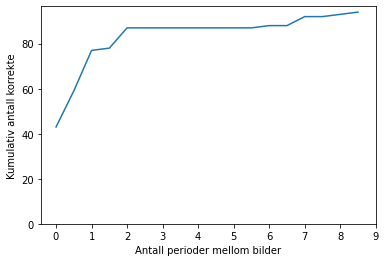

In [16]:
# Plotting the cumulative number of correct given period intervals

x = np.arange(0, 9, 0.5)

count_guess_full = count_guess.copy()
for u in x:
    if u not in count_guess_full.index:
        count_guess_full[u] = 0
count_guess_full = count_guess_full.sort_index()
guess_cum = np.cumsum(count_guess_full.to_numpy())

count_guess_5_full = count_guess_5.copy()
for u in x:
    if u not in count_guess_5_full.index:
        count_guess_5_full[u] = 0
count_guess_5_full = count_guess_5_full.sort_index()
guess_5_cum = np.cumsum(count_guess_5_full.to_numpy())

count_correct_full = count_correct.copy()
for u in x:
    if u not in count_correct_full.index:
        count_correct_full[u] = 0
count_correct_full = count_correct_full.sort_index()
correct_cum = np.cumsum(count_correct_full.to_numpy())

#plt.plot(unique, total_cum)
plt.plot(x, guess_cum)
#plt.plot(x, guess_5_cum)
plt.xlabel("Antall perioder mellom bilder")
plt.ylabel("Kumulativ antall korrekte")
plt.ylim(bottom=0)
plt.xscale("linear")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig("fig.png")
plt.show()